<a href="https://colab.research.google.com/github/v-polivka/PRJD_polivka/blob/main/PRJD_Polivka_V2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Načtení  knihoven
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
# Načtení datasetu
url = "https://raw.githubusercontent.com/Armita84/ChatGPT-Dataset-Reddit/refs/heads/main/chatgpt-reddit-comments.csv"
df = pd.read_csv(url)

In [3]:
# Prozkoumání datasetu
print(df.head())
print(df.info())
print(df.columns)

  Unnamed: 0 comment_id comment_parent_id  \
0          0    iztdxuh         t3_zj2aeu   
1          1    iztn0q0         t3_zj2aeu   
2          2    izudrph         t3_zj2aeu   
3          3    iztfhtb         t3_zj2aeu   
4          4    izu2as9         t3_zj2aeu   

                                        comment_body  subreddit  
0  I've been shocked for days now, I don't need c...  r/ChatGPT  
1   \n\nI am so angry right now. I just wasted my...  r/ChatGPT  
2  chatgpt karma whoring is here folks! just when...  r/ChatGPT  
3                                 Worked on me, ngl.  r/ChatGPT  
4  Certified 10/10, must-see moment. It really di...  r/ChatGPT  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         52413 non-null  object
 1   comment_id         52415 non-null  object
 2   comment_parent_id  52415 non-nul

In [4]:
# Tokenizace a základní statistiky slov
all_text = " ".join(df['comment_body'].astype(str))  # 'comment_body' je sloupec s komentáři
tokens = word_tokenize(all_text.lower())
tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]

print(f"Počet unikátních slov: {len(set(tokens))}")
print(f"Nejčastější slova: {pd.Series(tokens).value_counts().head(10)}")

Počet unikátních slov: 34403
Nejčastější slova: ai         9787
chatgpt    9573
like       9524
would      7453
people     7209
use        5181
get        5048
think      4957
one        4668
even       4331
Name: count, dtype: int64


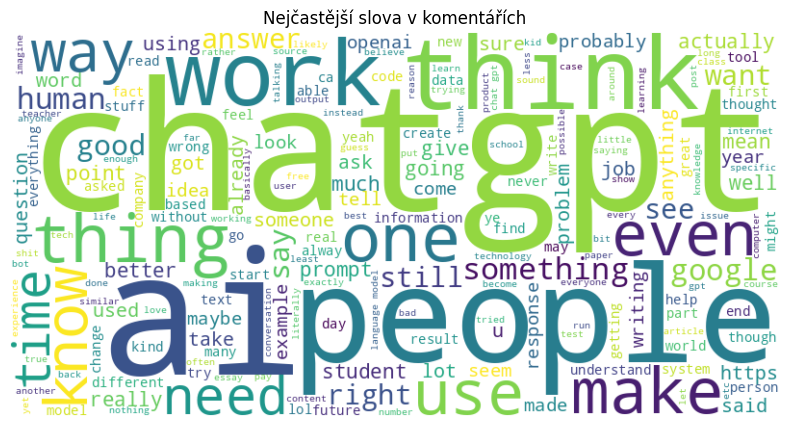

In [15]:
#WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(tokens))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Nejčastější slova v komentářích')
plt.show()

                                        comment_body  sentiment
0  I've been shocked for days now, I don't need c...  -0.700000
1   \n\nI am so angry right now. I just wasted my...  -0.032143
2  chatgpt karma whoring is here folks! just when...   0.437500
3                                 Worked on me, ngl.   0.000000
4  Certified 10/10, must-see moment. It really di...   0.200000
Average sentiment: 0.09512962394649865
Median sentiment: 0.029444444444444447


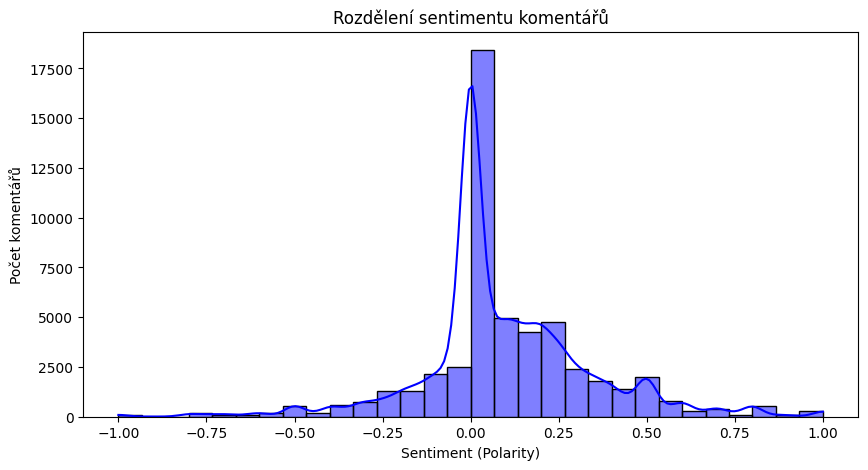

In [17]:
# Sentiment analýza
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['comment_body'].astype(str).apply(get_sentiment)

print(df[['comment_body', 'sentiment']].head())

# Výpočet základních statistik sentimentu
def analyze_sentiment(df):
    average_sentiment = df['sentiment'].mean()
    median_sentiment = df['sentiment'].median()
    print(f"Average sentiment: {average_sentiment}")
    print(f"Median sentiment: {median_sentiment}")
    return average_sentiment, median_sentiment

average_sentiment, median_sentiment = analyze_sentiment(df)

# Vizualizace sentimentu
plt.figure(figsize=(10, 5))
sns.histplot(df['sentiment'], bins=30, kde=True, color='blue')
plt.title('Rozdělení sentimentu komentářů')
plt.xlabel('Sentiment (Polarity)')
plt.ylabel('Počet komentářů')
plt.show()

['r/ChatGPT' 'subreddit' 'r/dataisbeautiful' 'r/Futurology' 'r/technology']


<ipython-input-21-26db0a909d48>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_positive, x='mean', y='subreddit', palette='Greens_r')


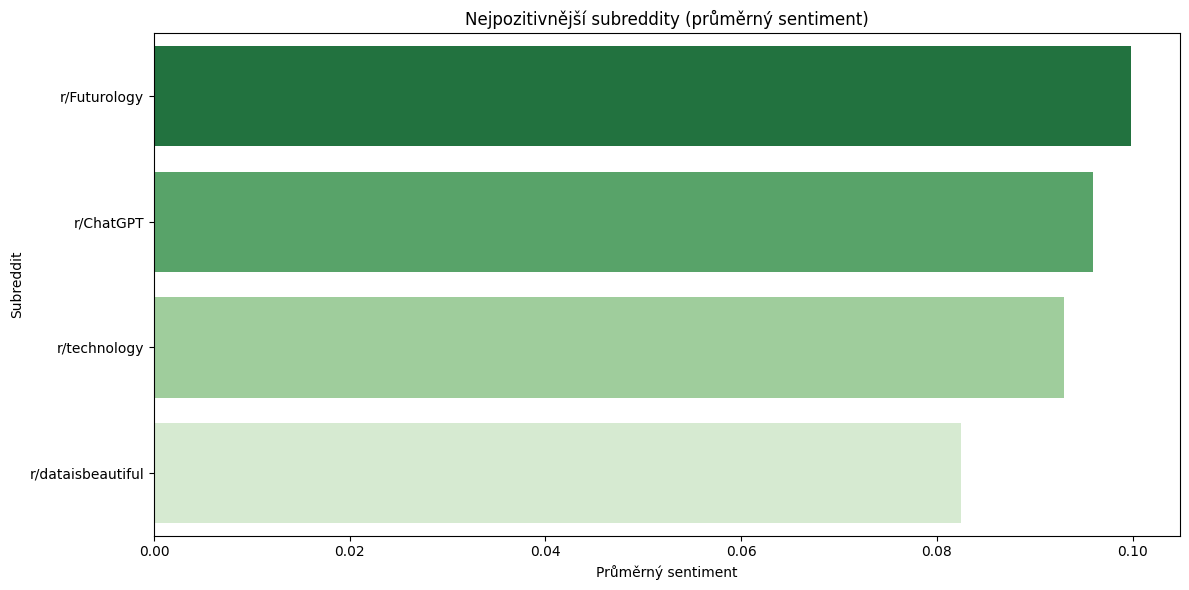

In [21]:
# Zkontrolujte název sloupce se subreddity
print(df['subreddit'].unique()[:5])  # Rychlá kontrola různých subredditů

# Vytvoření tabulky s průměrným sentimentem pro každý subreddit
sentiment_by_subreddit = df.groupby('subreddit')['sentiment'].agg(['mean', 'median', 'count']).reset_index()
sentiment_by_subreddit = sentiment_by_subreddit.sort_values('mean', ascending=False)

# Zobrazení nejpozitivnějších subredditů (s minimálním počtem komentářů - 50)
min_comments = 50
top_positive = sentiment_by_subreddit[sentiment_by_subreddit['count'] >= min_comments].head(5)

# Vizualizace nejpozitivnějších subredditů
plt.figure(figsize=(12, 6))
sns.barplot(data=top_positive, x='mean', y='subreddit', palette='Greens_r')
plt.title('Nejpozitivnější subreddity (průměrný sentiment)')
plt.xlabel('Průměrný sentiment')
plt.ylabel('Subreddit')
plt.tight_layout()
plt.show()